In [3]:
from wholeslidedata.image.wholeslideimage import WholeSlideImage


# The path can also be read from a config file, etc.
OPENSLIDE_PATH = r'C:\Users\Viren\Desktop/MSP_Cup_PDEU/code/openslide-bin-4.0.0.4-windows-x64\openslide-bin-4.0.0.4-windows-x64\bin'

import os
if hasattr(os, 'add_dll_directory'):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide

In [1]:
# Sample format

# WSI_DOWNLOAD_LINK = "https://drive.google.com/uc?id=1a-77TNRlSoPbRlNI0VtlHG3d7xTSpcwB"
# WSI_NAME = Path("TCGA-21-5784-01Z-00-DX1.tif")

# WSA_DOWNLOAD_LINK = "https://drive.google.com/uc?id=1jkTp0IJHHpmLd1yDO1L3KRFJgm0STh0d"
# WSA_NAME = Path("TCGA-21-5784-01Z-00-DX1.xml")

# WSM_DOWNLOAD_LINK = "https://drive.google.com/uc?id=1nLdKzSLq79mon1RCevgEmG59E8Oq9JhZ"
# WSM_NAME = Path("TCGA-21-5784-01Z-00-DX1_tb_mask.tif")

# def download_segmentation_data(output_folder=Path("/tmp/")):
#     _download(output_folder, WSI_DOWNLOAD_LINK, WSI_NAME)
#     _download(output_folder, WSA_DOWNLOAD_LINK, WSA_NAME)
#     _download(output_folder, WSM_DOWNLOAD_LINK, WSM_NAME)
    
# download_segmentation_data()

In [2]:
from wholeslidedata import WholeSlideImage
import numpy as np

from matplotlib import pyplot as plt
plt.rc('font', size=12) 

In [3]:
from wholeslidedata.interoperability.openslide.backend import OpenSlideWholeSlideImageBackend

In [4]:
wsi = WholeSlideImage('../data/wsibulk/images/103S.tif', backend=OpenSlideWholeSlideImageBackend)

In [5]:
spacing = 1.0
real_spacing = wsi.get_real_spacing(spacing)
shape = wsi.get_shape_from_spacing(spacing)
downsampling = wsi.get_downsampling_from_spacing(spacing)

In [6]:
print(f'wsi path: {wsi.path}')
print(f'level count: {wsi.level_count}')
print(f'spacings: {wsi.spacings}')
print(f'shapes:  {wsi.shapes}')
print(f'downsamplings: {wsi.downsamplings}')
print(f'closest real spacing to {spacing} = {real_spacing}')
print(f'shape at spacing {spacing} = {shape}')
print(f'downsampling at spacing {spacing} = {downsampling}')

wsi path: ../data/wsibulk/images/103S.tif
level count: 8
spacings: [0.45669399219053275, 0.9133879843810655, 1.826775968762131, 3.653551937524262, 7.307103875048524, 14.614207750097048, 29.228415500194096, 58.45683100038819]
shapes:  ((63488, 40064), (31744, 20032), (15872, 10016), (7936, 5008), (3968, 2504), (1984, 1252), (992, 626), (496, 313))
downsamplings: (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0)
closest real spacing to 1.0 = 0.9133879843810655
shape at spacing 1.0 = (31744, 20032)
downsampling at spacing 1.0 = 2.0


In [7]:
spacing = 0.5
real_spacing = wsi.get_real_spacing(spacing)
print(real_spacing)

0.45669399219053275


In [9]:
x, y = np.array(wsi.shapes[0]) / 2
width, height = 1024, 1024

slide8_0 = wsi.get_slide(spacing=8.0)
patch2_0 = wsi.get_patch(x=x, y=y, width=width, height=height, spacing=2.0)
patch0_5 = wsi.get_patch(x=x, y=y, width=width, height=height, spacing=0.5)

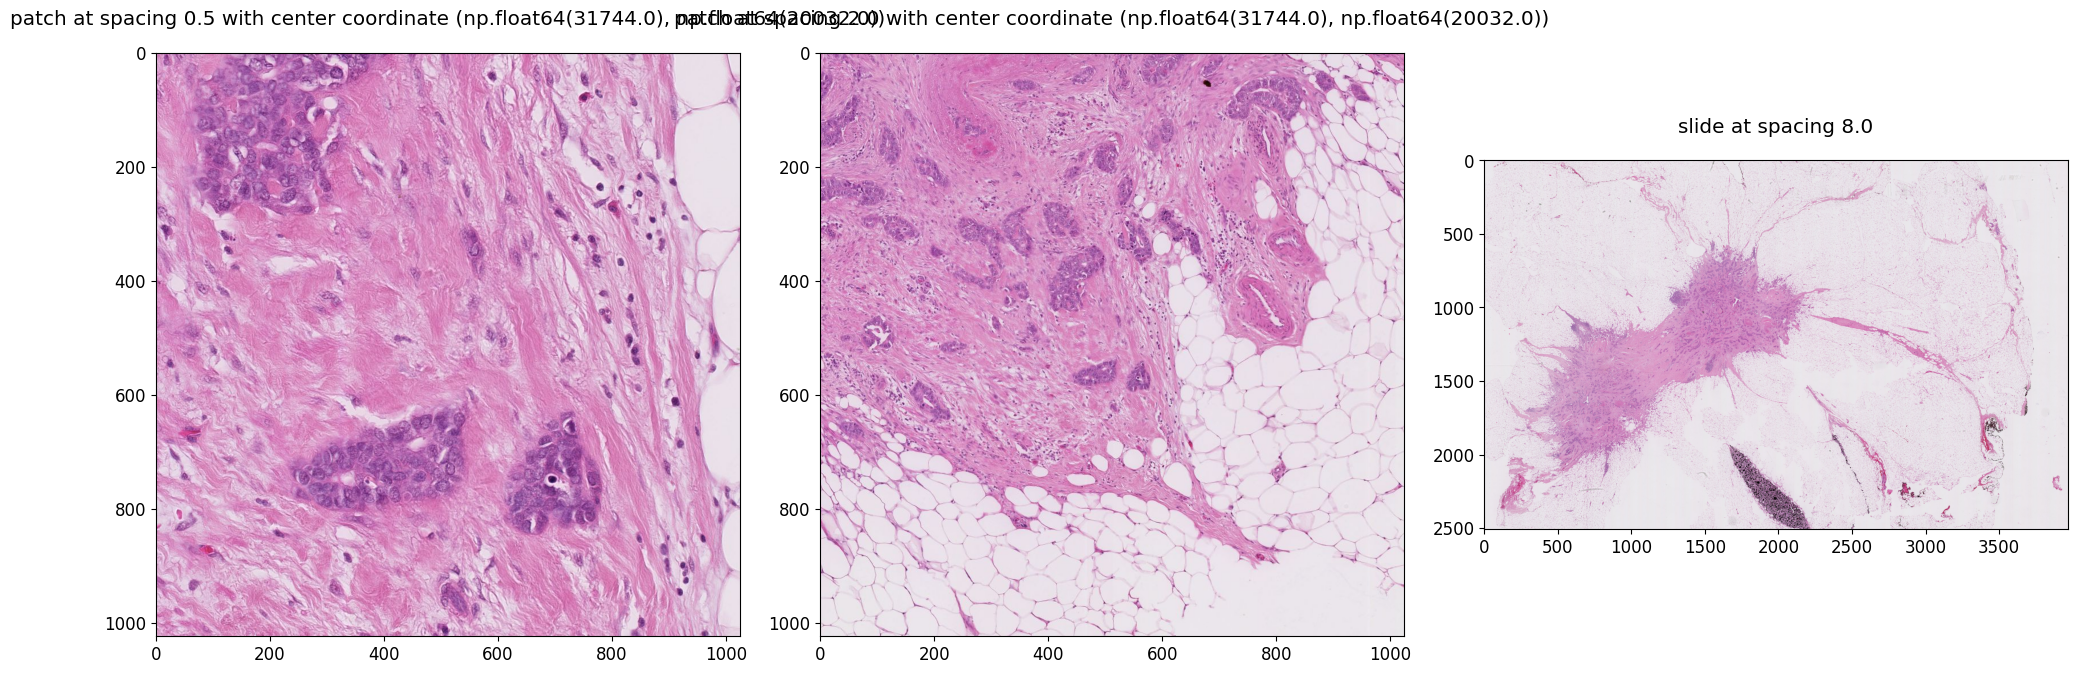

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(patch0_5)
axes[0].set_title(f'patch at spacing 0.5 with center coordinate {x,y}', pad=20)
axes[1].imshow(patch2_0)
axes[1].set_title(f'patch at spacing 2.0 with center coordinate {x,y}', pad=20)
axes[2].imshow(slide8_0)
axes[2].set_title(f'slide at spacing 8.0', pad=20)
plt.tight_layout()
plt.show()

In [11]:
print(type(slide8_0))

<class 'numpy.ndarray'>


In [14]:
patch2_0.shape

(1024, 1024, 3)

In [12]:
slide8_0.shape

(2504, 3968, 3)

In [16]:
plt.imsave('../code/converted_img/103S_slide8_0.png', slide8_0)

In [17]:
slide4_0 = wsi.get_slide(spacing=4.0)

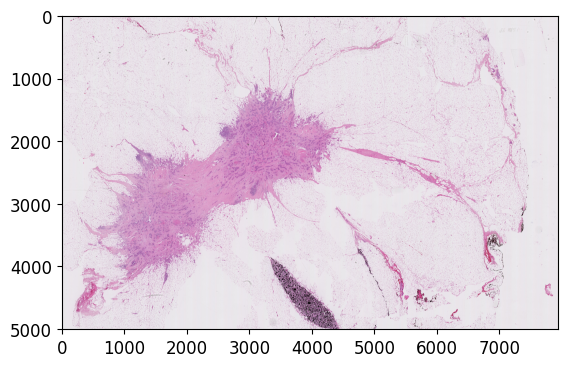

In [18]:
plt.imshow(slide4_0)

In [19]:
plt.imsave('../code/converted_img/103S_slide4_0.png', slide4_0)

In [22]:
from wholeslidedata import WholeSlideAnnotation
from wholeslidedata.visualization.plotting import plot_annotations
from colour import Color
from matplotlib import pyplot as plt

In [25]:
wsa = WholeSlideAnnotation('../data/wsibulk/annotations-tumor-bulk/xmls/103S.xml')

In [26]:
print(len(wsa.annotations))
print(wsa.labels.names)
color_map = {label_name: Color(pick_for=label_name).hex_l for label_name in wsa.labels.names}

1
['tumor-bulk']


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


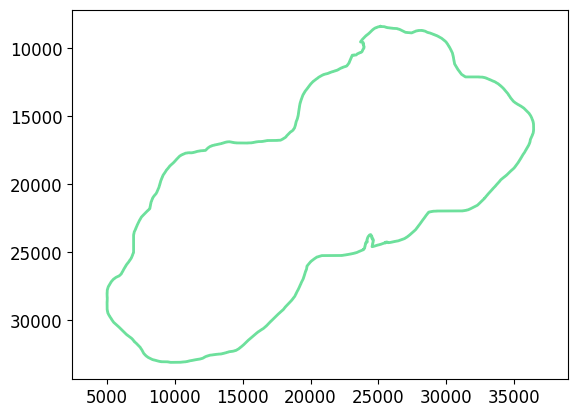

In [27]:
plot_annotations(wsa.annotations, color_map=color_map)

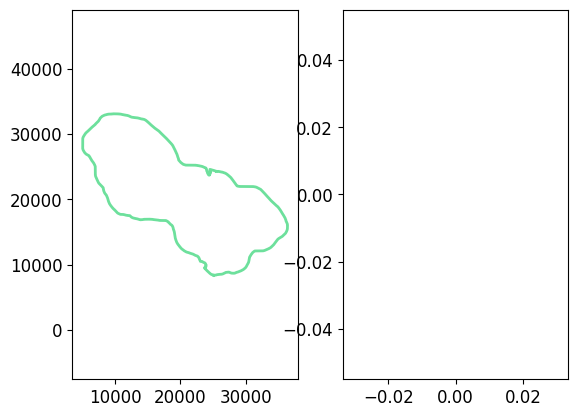

In [28]:
selected_annotations = wsa.select_annotations(center_x=7500, center_y=15000, width=5000, height=10000)
lymphocyte_annotations = [annotation for annotation in wsa.annotations if annotation.label.name == "lymphocytes"]
fig, axes = plt.subplots(1,2)
plot_annotations(selected_annotations, ax=axes[0], color_map=color_map)
plot_annotations(lymphocyte_annotations, ax=axes[1], color_map=color_map)
plt.show()

['tumor-bulk']


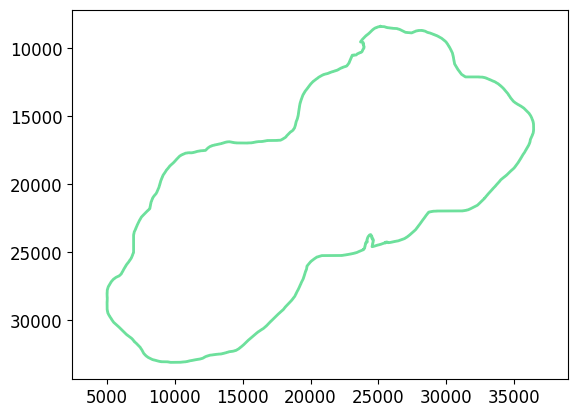

In [30]:
# wsa = WholeSlideAnnotation('/tmp/TCGA-21-5784-01Z-00-DX1.xml', labels={'tumor':1, 'stroma': 2, 'lymphocytes':2}, renamed_labels={'tumor':1, 'other':2})
print(wsa.labels.names)
color_map = {label_name: Color(pick_for=label_name).hex_l for label_name in wsa.labels.names}
plot_annotations(wsa.annotations, color_map=color_map)

In [33]:
# from wholeslidedata.annotation.hooks import ScalingAnnotationHook, TiledAnnotationHook

In [34]:
from wholeslidedata.iterators import create_batch_iterator
from wholeslidedata.visualization.plotting import plot_batch
from dicfg.magics import ConfigMagics

# This will allow loading yaml in an notebook cell
ConfigMagics.register_magics()

In [38]:
%%yaml user_config 

wholeslidedata:
    default:
        yaml_source:
            training:
            -   wsi: 
                    path: ../data/wsibulk/images/
                wsa: 
                    path: ../data/wsibulk/annotations-tumor-bulk/xmls/
                        
        labels:
            tumor-bulk
            
        batch_shape:
            batch_size: 4
            spacing: 1.0
            shape: [512, 512, 3]

In [1]:
from wholeslidedata.iterators import create_patch_iterator, PatchConfiguration

In [5]:
patch_configuration = PatchConfiguration(patch_shape=(1024,1024,3),
                                         spacings=(0.5,),
                                         overlap=(0,0),
                                         offset=(0,0),
                                         center=False)

with create_patch_iterator(image_path='../data/wsibulk/images/103S.tif',
                           patch_configuration=patch_configuration,
                           cpus=4,
                        ) as patch_iterator: 
                        #    backend='asap') as patch_iterator:
    
    print(f"Number of patches {len(patch_iterator)}\n")
    for idx, (patch, info) in enumerate(patch_iterator):
        print(f"Index : {idx}, \n Patch shape: {patch.shape}, \n Info : {info}\n")

Number of patches 2480



In [ ]:
help(PatchConfiguration)

In [ ]:
help(create_patch_iterator)

In [ ]:
patch_configuration = PatchConfiguration(patch_shape=(1024,1024,3),
                                         spacings=(0.5,),
                                         overlap=(0,0),
                                         offset=(0,0),
                                         center=False)

with create_patch_iterator(image_path='../data/wsibulk/images/128B.tif',
                           mask_path='../data/wsibulk/annotations-tumor-bulk/masks/128B.tif"',
                           patch_configuration=patch_configuration,
                           cpus=8) as patch_iterator:
    
    print(f"Number of patches {len(patch_iterator)}\n")
    for idx, (patch, mask, info) in enumerate(patch_iterator):
        print(f"Index : {idx}, \n Patch shape: {patch.shape}, \n Mask shape: {mask.shape}, \n Info : {info}\n")

In [ ]:
!pip install asap

In [ ]:
from wholeslidedata.image.backend import WholeSlideImageBackend
from wholeslidedata.interoperability.asap.backend import AsapWholeSlideImageBackend
from wholeslidedata import WholeSlideImage
from wholeslidedata.iterators import create_batch_iterator

In [ ]:
wsi = WholeSlideImage('/tmp/TCGA-21-5784-01Z-00-DX1.tif', backend=AsapWholeSlideImageBackend)
wsi._backend

In [ ]:
wsi = WholeSlideImage('/tmp/TCGA-21-5784-01Z-00-DX1.tif', backend="openslide")
wsi._backend